In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
homology_file = "../data/output/homology/homology.tsv"

# Output
homology_plot = "../data/output/homology/homology.png"
homology_table = "../data/output/homology/homology_filters.tsv"

In [3]:
df = pd.read_csv(homology_file, sep='\t', na_values=['None'])
df

,disprot_id,db,blast_acc,blast_id,local_acc,local_id,global_acc,global_id
0,DP02342|P06837,disprot,DP00951|P17677,79.295154,DP00951|P17677,85.462555,DP00951|P17677,85.462555
1,DP02342|P06837,pdb,7vfw_A,29.515419,7jtk_j,31.277533,6ylh_v,57.268722
2,DP02348|Q8N5F7,disprot,DP01880|Q15596,6.506024,DP01880|Q15596,20.481928,DP01103|Q13698,33.493976
3,DP02348|Q8N5F7,pdb,7w5b_3,100.000000,7w5b_3,100.000000,7w5b_3,100.000000
4,DP02361|O95429,disprot,DP00846|O60888,3.282276,DP03650|Q01484,17.505470,DP03650|Q01484,42.231947
...,...,...,...,...,...,...,...,...
672,DP03743|Q96QZ7,pdb,2kpl_A,8.450704,2xkx_B,11.200537,5xmc_A,15.023474
673,DP03744|Q9VVJ7,disprot,DP03390|Q2UZM9,12.359551,DP01869|P51587,23.595506,DP01116|Q03164,55.056180
674,DP03744|Q9VVJ7,pdb,2a4h_A,65.730337,2a4h_A,65.730337,2a4h_A,66.853933
675,DP03746|Q9QUH6-2,disprot,DP01332|P17931,3.193146,DP01116|Q03164,23.442368,DP01116|Q03164,35.202492


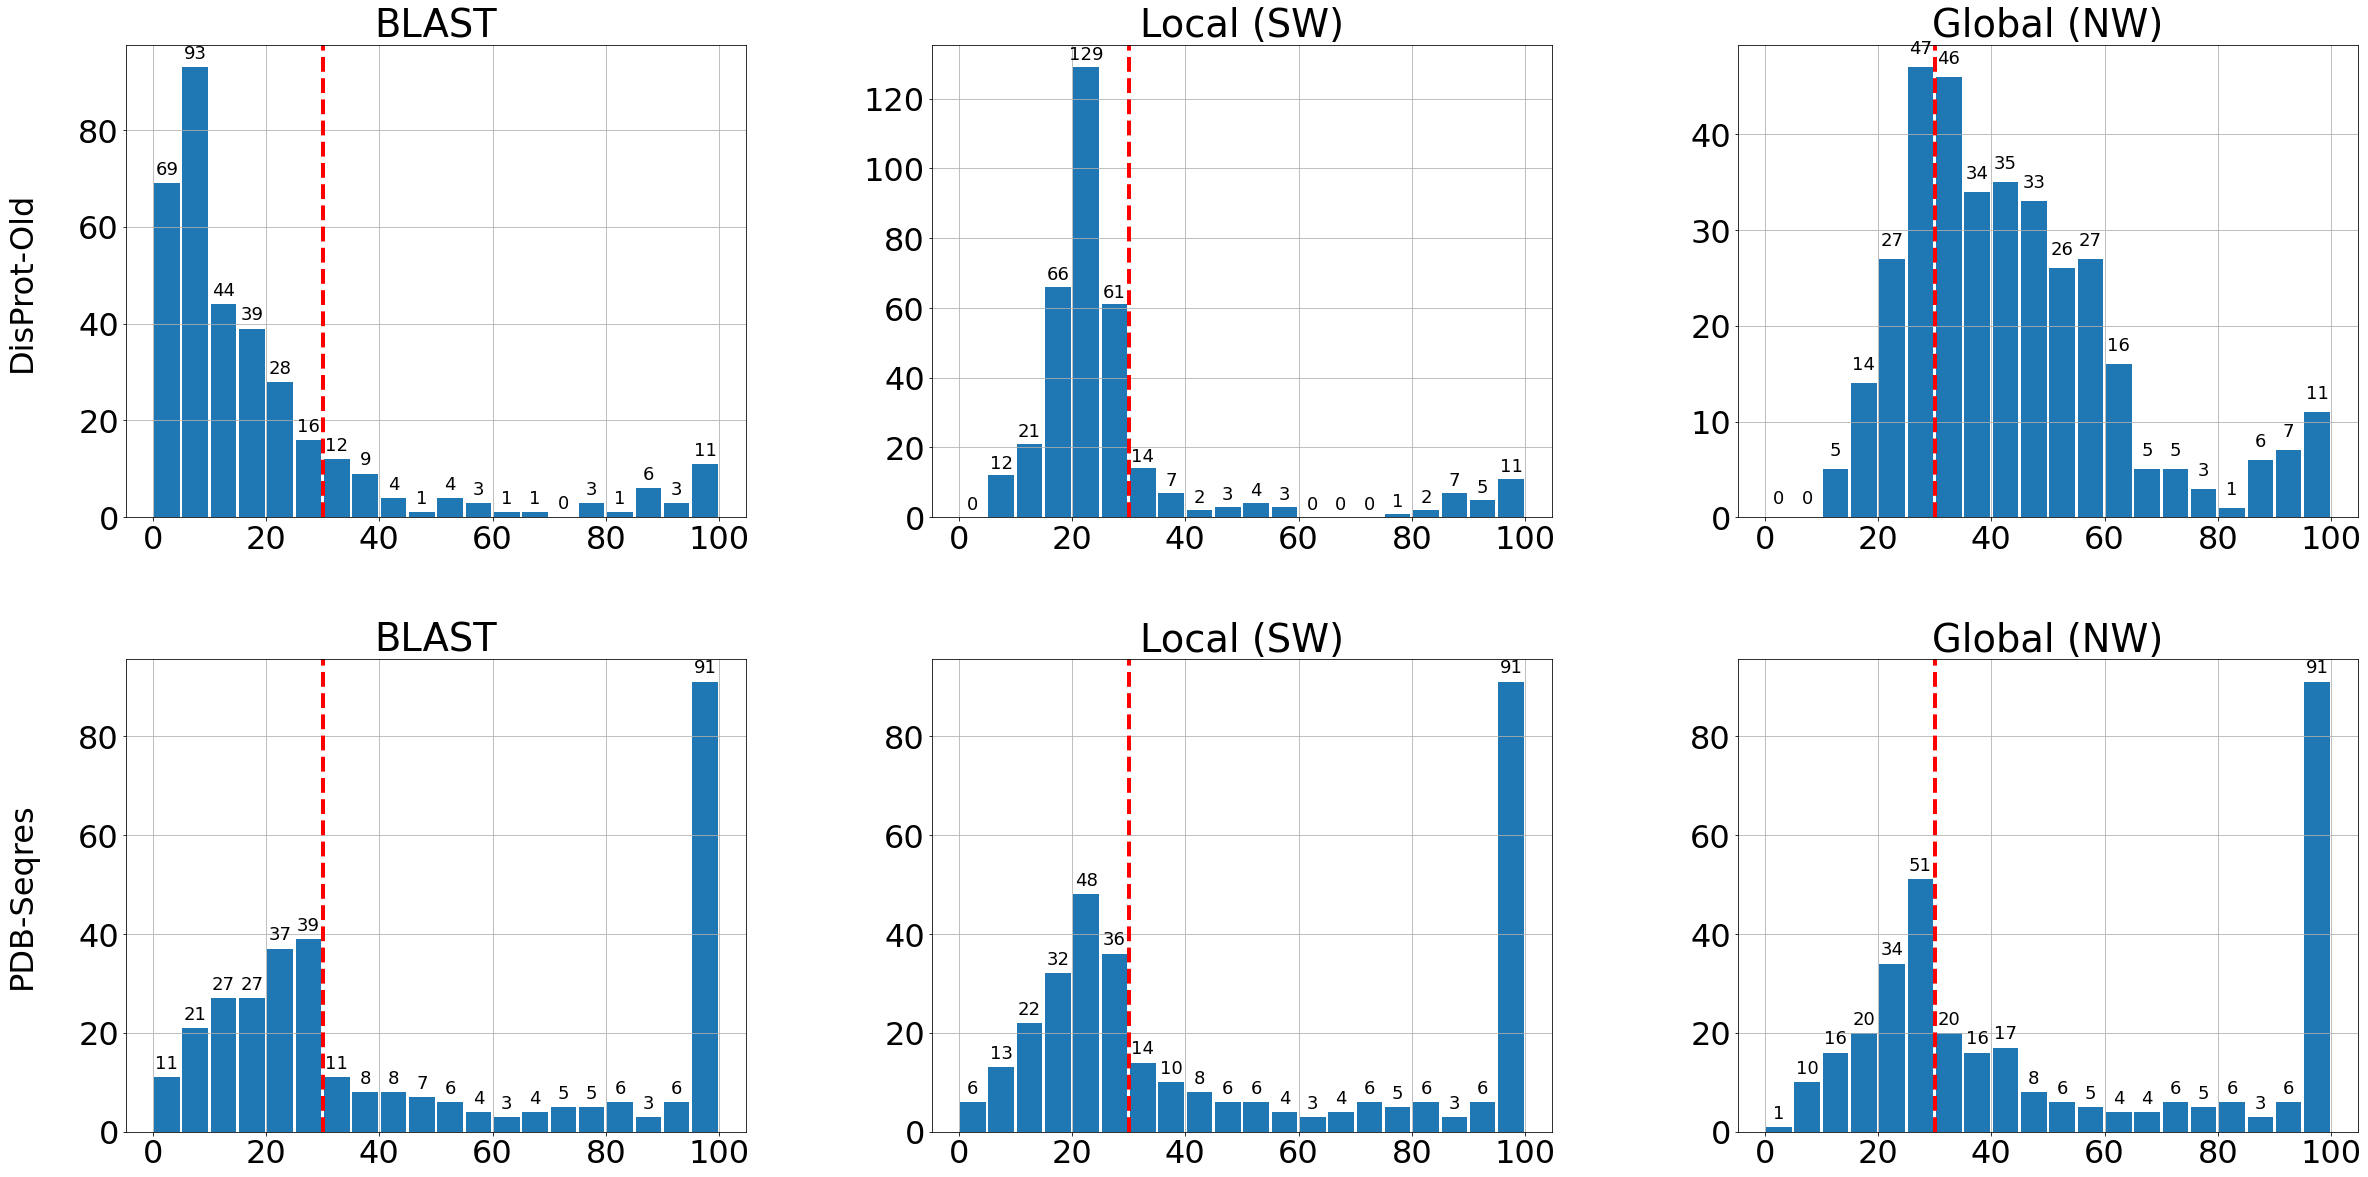

In [4]:
font = {'size'   : 32}
plt.rc('font', **font)

columns = ['blast_id', 'local_id', 'global_id']
titles = ['BLAST', 'Local (SW)', 'Global (NW)']
dbs = ['DisProt-Old', 'PDB-Seqres']

fig, axes = plt.subplots(2, 3, figsize=(40, 20))

for i, (db, df_g) in enumerate(df.groupby("db")):
    
    df_g.hist(ax=axes[i,:], bins=[i for i in range(0, 101, 5)], rwidth=0.9, column=columns)

    # Vertical lines and bar height
    for j, (ax, title) in enumerate(zip(axes[i,:].reshape(-1), titles)):
        if j == 0:
            ax.set_ylabel(dbs[i], labelpad=40, fontdict=font)
        ax.set_title(title)
        ax.axvline(30, lw=4, color='red', linestyle='--')
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2.0, p.get_height() + 1.0), ha='center', va='bottom', fontsize=18)


fig.savefig(homology_plot, bbox_inches='tight')


In [5]:
df['no_pdb_blast'] = 0
df.loc[(df['db'] == 'pdb') & (df['blast_id'] < 30.0), 'no_pdb_blast'] = 1

df['no_disprot_blast'] = 0
df.loc[(df['db'] == 'disprot') & (df['blast_id'] < 30.0), 'no_disprot_blast'] = 1

df['no_pdb_local'] = 0
df.loc[(df['db'] == 'pdb') & (df['local_id'] < 30.0), 'no_pdb_local'] = 1

df['no_disprot_local'] = 0
df.loc[(df['db'] == 'disprot') & (df['local_id'] < 30.0), 'no_disprot_local'] = 1

df['no_pdb_global'] = 0
df.loc[(df['db'] == 'pdb') & (df['global_id'] < 30.0), 'no_pdb_global'] = 1

df['no_disprot_global'] = 0
df.loc[(df['db'] == 'disprot') & (df['global_id'] < 30.0), 'no_disprot_global'] = 1

df.to_csv(homology_table, sep="\t", index=False)
df

,disprot_id,db,blast_acc,blast_id,local_acc,local_id,global_acc,global_id,no_pdb_blast,no_disprot_blast,no_pdb_local,no_disprot_local,no_pdb_global,no_disprot_global
0,DP02342|P06837,disprot,DP00951|P17677,79.295154,DP00951|P17677,85.462555,DP00951|P17677,85.462555,0,0,0,0,0,0
1,DP02342|P06837,pdb,7vfw_A,29.515419,7jtk_j,31.277533,6ylh_v,57.268722,1,0,0,0,0,0
2,DP02348|Q8N5F7,disprot,DP01880|Q15596,6.506024,DP01880|Q15596,20.481928,DP01103|Q13698,33.493976,0,1,0,1,0,0
3,DP02348|Q8N5F7,pdb,7w5b_3,100.000000,7w5b_3,100.000000,7w5b_3,100.000000,0,0,0,0,0,0
4,DP02361|O95429,disprot,DP00846|O60888,3.282276,DP03650|Q01484,17.505470,DP03650|Q01484,42.231947,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,DP03743|Q96QZ7,pdb,2kpl_A,8.450704,2xkx_B,11.200537,5xmc_A,15.023474,1,0,1,0,1,0
673,DP03744|Q9VVJ7,disprot,DP03390|Q2UZM9,12.359551,DP01869|P51587,23.595506,DP01116|Q03164,55.056180,0,1,0,1,0,0
674,DP03744|Q9VVJ7,pdb,2a4h_A,65.730337,2a4h_A,65.730337,2a4h_A,66.853933,0,0,0,0,0,0
675,DP03746|Q9QUH6-2,disprot,DP01332|P17931,3.193146,DP01116|Q03164,23.442368,DP01116|Q03164,35.202492,0,1,0,1,0,0
